John Boyd
<br/>
**Python version:** 3

<br />
Try to use:
- Basic graphing and display of data trends
- Regression techniques on exploratory variables for accidents (and maybe severity and weather+time?)
- Time series
- classification
- State with highest accidents, time with highest accident. Then regression for multiple variables time + state + weather?

In [1]:
# Relevant imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Load data into memory
data = pd.read_csv('~/AD450_Scripts/US_Accidents/US_Accidents_Dec20.csv')

<br />

**1. UNDERSTANDING INITIAL DATASET**

In [4]:
# Get a sense of the data
print(len(data))
data.head()

4232541


,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


*Table showing basics of the data. Roughly ~4 million rows. **Note that this does not show all columns.***

In [5]:
# List all columns since some were obscured
list_of_column_names = list(data.columns)
print('All column names: ', list_of_column_names)

All column names:  ['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']


*Get a list of all the 49 columns in the dataset.*

In [6]:
# First check is any entries are null
data.isnull().sum()

ID                             0
Source                         0
TMC                      1516064
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  2716477
End_Lng                  2716477
Distance(mi)                   0
Description                    2
Number                   2687949
Street                         0
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1292
Country                        0
Timezone                    4615
Airport_Code                8973
Weather_Timestamp          62644
Temperature(F)             89900
Wind_Chill(F)            1896001
Humidity(%)                95467
Pressure(in)               76384
Visibility(mi)             98668
Wind_Direction             83611
Wind_Speed(mph)           479326
Precipitat

*Checking columns that contain no entries. Particularly Time and Location columns.*

<br />

**2. INITAL DATA ANALYSIS & GRAPHING**

**a. Accidents Vs. State**

In [161]:
# Group data by state, and set index to State
accidents_per_state = data.groupby('State')[['ID']].count()

In [162]:
# Sort data into descending list by state
accidents_per_state.head()

,ID
State,
AL,57017
AR,5105
AZ,93103
CA,972585
CO,54035


*List of most accidents per first five states.*

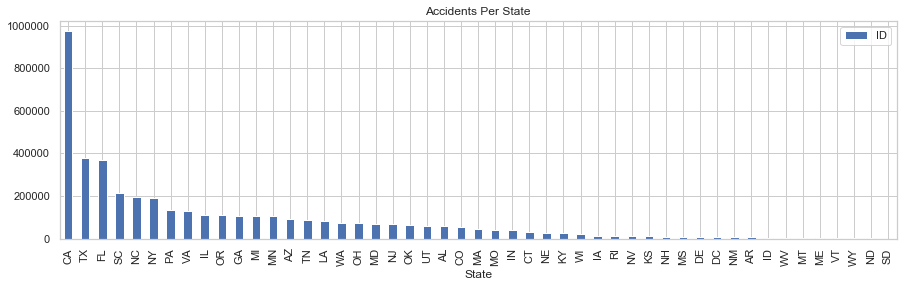

In [144]:
accidents_per_state = accidents_per_state.sort_values(by = "ID", ascending = False)
accidents_per_state.plot.bar(title = 'Accidents Per State', figsize = (15,4))

*Accidents per State.*

In [148]:
# Reset index and sort
accidents_per_state = data.groupby('State')[['ID']].count().reset_index()
accidents_per_state = accidents_per_state.sort_values(by = "ID", ascending = False)

[Text(0.5, 0, 'Accidents'), Text(0.5, 1.0, 'Accidents Vs. State')]

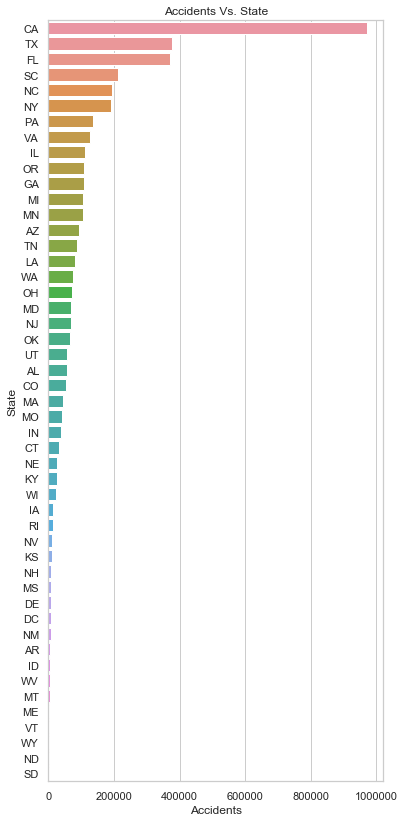

In [149]:
# https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py
# https://stackoverflow.com/questions/14770735/how-do-i-change-the-figure-size-with-subplots

sns.set(style = "whitegrid") # Create plot with vertical grid lines

fig, axesSubplot = plt.subplots(figsize = (6, 14)) # Create subplot figure size dimensions

axesBarPlot = sns.barplot( x = "ID", y = "State", data = accidents_per_state) # Plot state vs. accident data
axesBarPlot.set(xlabel = 'Accidents', title = "Accidents Vs. State") # Set custom x-axis label

*We can clearly see that California has a extremely large accident count. Could this figure be due to their large population, rate of reporting, or perhaps other reasons besides these?*

<br/>

**b. Accidents Per State Population**

In [154]:
accidents_per_pop = data.groupby('State')[['ID']].count()

In [155]:
# Note: No Alaska or Hawaii. But there is DC
test = pd.DataFrame({'AL': [4921532], 'AR': [3030522], 'AZ': [7421401], 'CA': [39368078], 'CO': [5807719], 'CT': [3557006], 'DC': [712816], 'DE': [986809], 'FL': [21733312], 'GA': [10710017], 'IA': [3163561], 'ID': [1826913], 'IL': [12587530], 'IN': [6754953], 'KS': [2913805], 'KY': [4477251], 'LA': [4645318], 'MA': [6893574], 'MD': [6055802], 'ME': [1350141], 'MI': [9966555], 'MN': [5657342], 'MO': [6151548], 'MS': [2966786], 'MT': [1080577], 'NC': [10600823], 'ND': [765309], 'NE': [1937552], 'NH': [1366275], 'NJ': [8882371], 'NM': [2106319], 'NV': [3138259], 'NY': [19336776], 'OH': [11693217], 'OK': [3980783], 'OR': [4241507], 'PA': [12783254], 'RI': [1057125], 'SC': [5218040], 'SD': [892717], 'TN': [6886834], 'TX': [29360759], 'UT': [3249879], 'VA': [8590563], 'VT': [623347], 'WA': [7693612], 'WI': [5832655], 'WV': [1784787], 'WY': [582328]})
# As list
# test = [4921532, 3030522,7421401,39368078,5807719,3557006,712816,986809,21733312,10710017,3163561,1826913,12587530,6754953,2913805,4477251,4645318,6893574,6055802,1350141,9966555,5657342,6151548,2966786,1080577,10600823,765309,1937552,1366275,8882371,2106319,3138259,19336776,11693217,3980783,4241507,12783254,1057125,5218040,892717,6886834,29360759,3249879,8590563,623347,7693612,5832655,1784787,582328]

# Transpose data
tester = test.T

# Append population data
accidents_per_pop['Pop'] = tester

accidents_per_pop['Acc Per Pop'] = accidents_per_pop['ID'] / accidents_per_pop['Pop'] * 10000
accidents_per_pop.head()

,ID,Pop,Acc Per Pop
State,,,
AL,57017,4921532,115.852137
AR,5105,3030522,16.845283
AZ,93103,7421401,125.452054
CA,972585,39368078,247.049145
CO,54035,5807719,93.039970


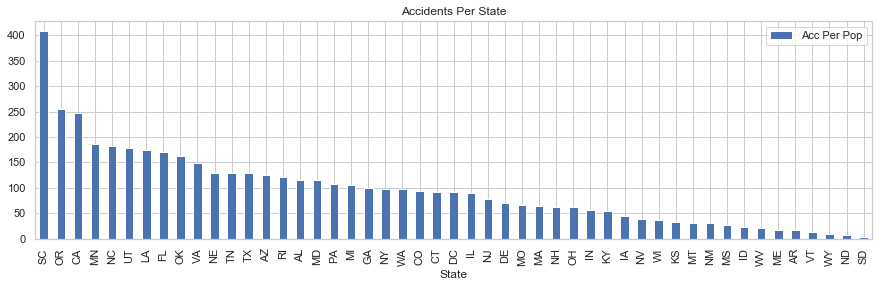

In [157]:
# dataGroup.sort_values(by = "Acc Per Pop", ascending = False)
accidents_per_pop = accidents_per_pop.sort_values(by = "Acc Per Pop", ascending = False)
accidents_per_pop[['Acc Per Pop']].plot.bar(title = 'Accidents Per State', figsize = (15,4))


*Accidents Per 10000 people*

In [ ]:
# Trying to make a nice plot with sns, but not working currently

# dataGroup = dataGroup.sort_values(by = "Acc Per Pop", ascending = False)
# sns.set(style = "whitegrid") # Create plot with vertical grid lines

# fig, axesSubplot = plt.subplots(figsize = (14, 6)) # Create subplot figure size dimensions

# axesBarPlot = sns.barplot(  data = dataGroup) # Plot state vs. accident data
# # axesBarPlot.set(xlabel = 'Accidents', title = "Accidents Vs. State") # Set custom x-axis label

<br/>

**c. Accidents vs. Time Of Day**

In [164]:
# Group by time and ID
accidents_per_time = data.groupby('Start_Time')[['ID']].count()


In [ ]:
# Next: DO NOT RUN THIS LINE, find a simple way to group accidents by day/month first then group by hour intervals
# accidents_per_time[['ID']].plot.bar(title = 'Accidents Per Time', figsize = (15,4))

In [159]:
# Notes cell
# # Group data by state
# dataGroup = data.groupby('State')[['ID']].count()
# accidents_per_state = dataGroup.reset_index()

# # dataGroup

# # Note: No Alaska or Hawaii. But there is DC
# test = pd.DataFrame({'AL': [4921532], 'AR': [3030522], 'AZ': [7421401], 'CA': [39368078], 'CO': [5807719], 'CT': [3557006], 'DC': [712816], 'DE': [986809], 'FL': [21733312], 'GA': [10710017], 'IA': [3163561], 'ID': [1826913], 'IL': [12587530], 'IN': [6754953], 'KS': [2913805], 'KY': [4477251], 'LA': [4645318], 'MA': [6893574], 'MD': [6055802], 'ME': [1350141], 'MI': [9966555], 'MN': [5657342], 'MO': [6151548], 'MS': [2966786], 'MT': [1080577], 'NC': [10600823], 'ND': [765309], 'NE': [1937552], 'NH': [1366275], 'NJ': [8882371], 'NM': [2106319], 'NV': [3138259], 'NY': [19336776], 'OH': [11693217], 'OK': [3980783], 'OR': [4241507], 'PA': [12783254], 'RI': [1057125], 'SC': [5218040], 'SD': [892717], 'TN': [6886834], 'TX': [29360759], 'UT': [3249879], 'VA': [8590563], 'VT': [623347], 'WA': [7693612], 'WI': [5832655], 'WV': [1784787], 'WY': [582328]})

# # List Form
# # test = [4921532, 3030522,7421401,39368078,5807719,3557006,712816,986809,21733312,10710017,3163561,1826913,12587530,6754953,2913805,4477251,4645318,6893574,6055802,1350141,9966555,5657342,6151548,2966786,1080577,10600823,765309,1937552,1366275,8882371,2106319,3138259,19336776,11693217,3980783,4241507,12783254,1057125,5218040,892717,6886834,29360759,3249879,8590563,623347,7693612,5832655,1784787,582328]

# # Transpose data
# tester = test.T

# # Append population data
# dataGroup['Pop'] = tester
# dataGroup

# dataGroup.iat[1,0] # prints 1st accident value for AL
# print(dataGroup.iat[0,0])
# print(tester.iat[0,0])
# dataGroup.iat[0,0] / tester.iat[0,0]

# count = 0;
# for x in test:
    
    
#     print(x, dataGroup.iat[count, 0] / test[x]) # outputs accidents per population
#     count = count + 1



In [ ]:
# test = pd.DataFrame({'AL': [4921532], 'AR': [3030522], 'AZ': [7421401], 'CA': [39368078], 'CO': [5807719], 'CT': [3557006], 'DC': [712816], 'DE': [986809], 'FL': [21733312], 'GA': [10710017], 'IA': [3163561], 'ID': [1826913], 'IL': [12587530], 'IN': [6754953], 'KS': [2913805], 'KY': [4477251], 'LA': [4645318], 'MA': [6893574], 'MD': [6055802], 'ME': [1350141], 'MI': [9966555], 'MN': [5657342], 'MO': [6151548], 'MS': [2966786], 'MT': [1080577], 'NC': [10600823], 'ND': [765309], 'NE': [1937552], 'NH': [1366275], 'NJ': [8882371], 'NM': [2106319], 'NV': [3138259], 'NY': [19336776], 'OH': [11693217], 'OK': [3980783], 'OR': [4241507], 'PA': [12783254], 'RI': [1057125], 'SC': [5218040], 'SD': [892717], 'TN': [6886834], 'TX': [29360759], 'UT': [3249879], 'VA': [8590563], 'VT': [623347], 'WA': [7693612], 'WI': [5832655], 'WV': [1784787], 'WY': [582328]})
